In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
all_data = pd.read_feather(r'/Users/sviatlana_antonava/DA/DA Real-World projects/Sales Analysis/4./Sales_data.ftr')

In [4]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost,
purchase address, etc

1. Data cleaning and formatting

In [6]:
all_data.isnull().sum()  ## checking out total missing values we have 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')

In [8]:
all_data = all_data.drop_duplicates() ### checking out duplicate rows

In [9]:
all_data.shape

(185687, 6)

2. Which is the best month for sale?

In [11]:
all_data['Order Date'][0].split('/')[0]  ## extracting month from "Order Date"

'04'

In [12]:
def return_month(x):
    return x.split('/')[0]

In [13]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [14]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [15]:
all_data['Month'].unique() ## checking unique months 

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [16]:
filter1 = all_data['Month'] == 'Order Date'

In [17]:
all_data = all_data[~filter1] ## excluding all those rows which have entry as "Order Date" in month feature ..

In [18]:
all_data.shape

(185686, 7)

In [19]:
all_data['Month'] = all_data['Month'].astype(int)

In [20]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [21]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [22]:
all_data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [23]:
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

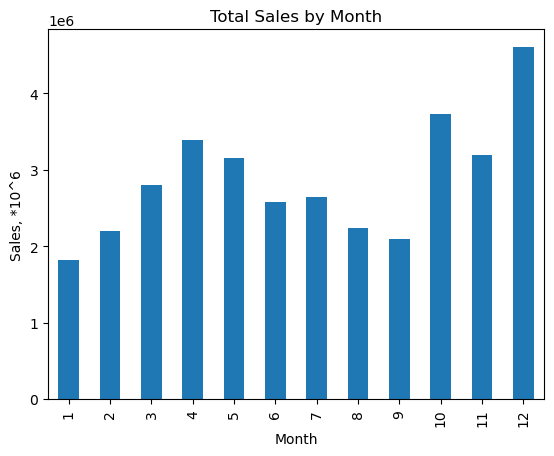

In [24]:
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')
plt.title('Total Sales by Month')
plt.ylabel('Sales, *10^6')
plt.yticks()
plt.show()                           ## December is the best month of sales!

3. Which city has max order?

In [27]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [28]:
all_data['Purchase Address'][0].split(',')[1]  ## extracting city from "Purchase Address"

' Dallas'

In [29]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [30]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [31]:
all_data['city'].value_counts() ## frequency table..

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

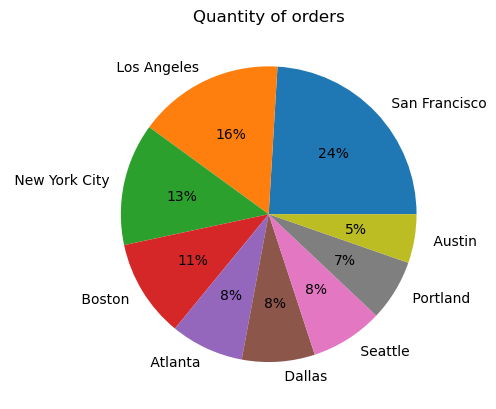

In [32]:
pd.value_counts(all_data['city']).plot(kind='pie', autopct = '%1.0F%%')
plt.title('Quantity of orders')
plt.ylabel('')
plt.show()                  ## New York , Los Angeles , San Francisco are the Top 3 cities which has max order 

4. What product sold the most & Why?

In [34]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [35]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

In [36]:
count_df = count_df.reset_index()

In [37]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [38]:
products = count_df['Product'].values

In [39]:
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

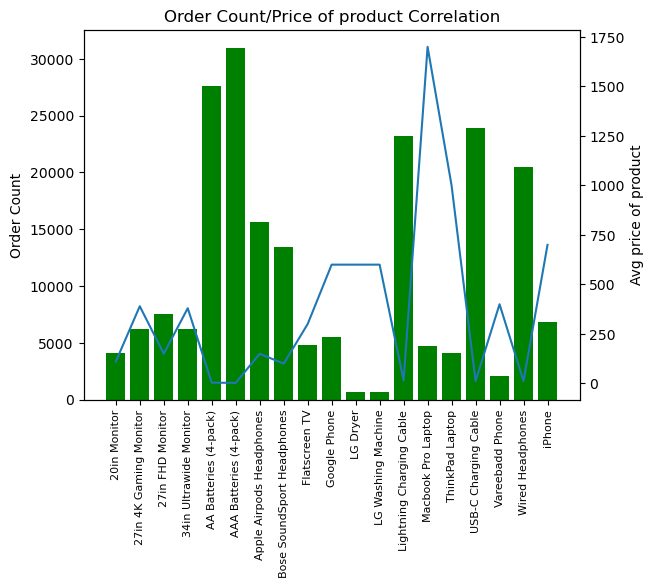

In [40]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation='vertical', fontsize=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')
plt.title('Order Count/Price of product Correlation')
plt.show()

The top selling product is 'AAA Batteries'. 
The top selling products seems to have a correlation with the price of the product. 
The cheaper the product higher the quantity ordered and vice versa.

5. Understanding Trend of the most sold product

In [43]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [44]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [45]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [46]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]

In [47]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [48]:
most_sold_product_df.groupby(['Month', 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [49]:
pivot = most_sold_product_df.groupby(['Month', 'Product']).size().unstack()

In [50]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


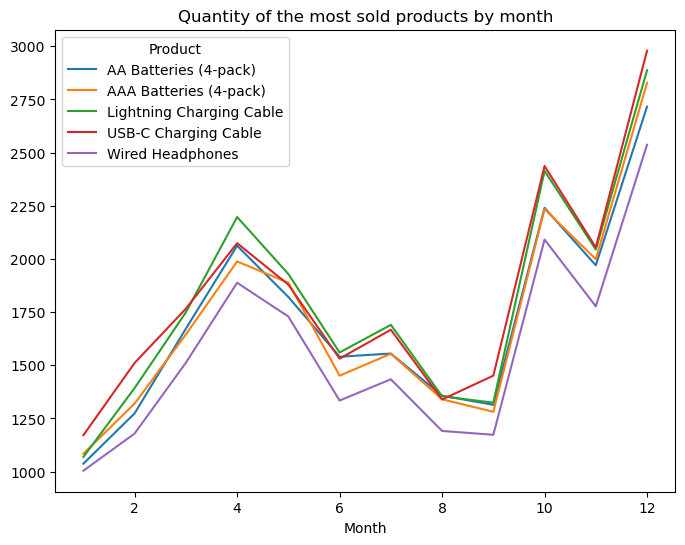

In [51]:
pivot.plot(figsize=(8,6))
plt.title('Quantity of the most sold products by month')
plt.show()                       ## Products have been sold more in Oct , Nov , Dec

6. What products are most often sold together?

In [53]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [54]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [55]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [56]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().
rename(columns={'Product':'Grouped_products'})
## for every Order-Id , collect all the products ..

In [57]:
dup_products

,Order ID,Grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [58]:
dup_products_df = df_duplicated.merge(dup_products, how='left', on='Order ID')

In [59]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [60]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID']) ## drop out all duplicate Order ID

In [61]:
no_dup_df.shape

(6879, 10)

In [62]:
no_dup_df['Grouped_products'].value_counts()

Grouped_products
iPhone,Lightning Charging Cable                     886
Google Phone,USB-C Charging Cable                   857
iPhone,Wired Headphones                             361
Vareebadd Phone,USB-C Charging Cable                312
Google Phone,Wired Headphones                       303
                                                   ... 
34in Ultrawide Monitor,20in Monitor                   1
Google Phone,Wired Headphones,Macbook Pro Laptop      1
LG Dryer,Vareebadd Phone                              1
20in Monitor,34in Ultrawide Monitor                   1
LG Washing Machine,AA Batteries (4-pack)              1
Name: count, Length: 350, dtype: int64

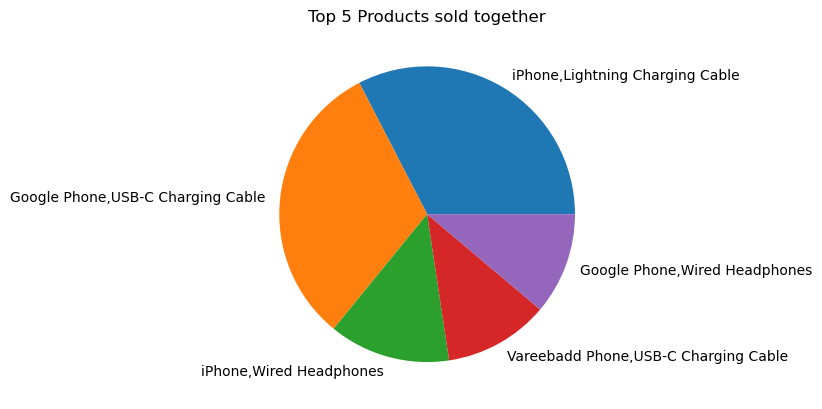

In [63]:
no_dup_df['Grouped_products'].value_counts()[0:5].plot.pie()
plt.ylabel('')
plt.title('Top 5 Products sold together')
plt.show()